In [102]:
import numpy as np
import math
from timeit import default_timer as timer
import matplotlib.pyplot as plt

In [11]:
def symmetric_generator(n):
    a = np.random.randn(n, n)
    return np.tril(a) + np.tril(a, -1).T

In [12]:
def vec_mod(n):
    return math.sqrt(sum([i ** 2 for i in n]))

In [13]:
def numpy_eig(a):
    w, v = np.linalg.eigh(a)
    return w, v

In [14]:
def power_eig(a, iterations, epsilon):
    x = np.random.rand(a.shape[0])
    dx0 = 0
    dx1 = 1
    i = 0
    while (i < iterations and abs(dx0 - dx1) > epsilon):
        dx0 = vec_mod(x)
        
        y = a @ x
        y_norm = np.linalg.norm(y)
        x = y / y_norm
        
        dx1 = vec_mod(x)
        i += 1
    return x    

In [17]:
def inverse_eig(a,)

SyntaxError: invalid syntax (<ipython-input-17-515bd2d91fd5>, line 1)

#### Symetryczna macierz liczb rzeczywistych

In [79]:
a = symmetric_generator(3)
print(a)

[[ 1.43763985 -0.40776926 -0.19437265]
 [-0.40776926  1.21675168  0.98347056]
 [-0.19437265  0.98347056 -0.44974904]]


#### Funkcja numpy.linalg.eigh

In [80]:
w, v = numpy_eig(a)

for i in range(len(w)):
    print(w[i], v[:,i])

-0.905509122378 [ 0.0021675  -0.42011147  0.90746992]
1.08836360979 [ 0.79107347  0.55583802  0.25543466]
2.02178800758 [-0.61171731  0.71732172  0.33354382]


#### Sprawdzenie

In [81]:
v @ np.diag(w) @ np.transpose(v) # Tw o symetrycznym zadaniu własnym

array([[ 1.43763985, -0.40776926, -0.19437265],
       [-0.40776926,  1.21675168,  0.98347056],
       [-0.19437265,  0.98347056, -0.44974904]])

#### Power Iteration

In [97]:
u1 = power_eig(a, 1000, 0.00000001)
l1 = (a @ u1) / u1 # Ax = lx -> l = Ax / x
print (np.mean(l1), u1)

2.02901419758 [-0.24225789  0.58133782  0.77676087]


#### Size vs Time

In [125]:
size = [10, 50, 100, 150, 300, 400, 500, 750, 1000]
time = [0, 0, 0, 0, 0, 0, 0, 0, 0]
for j in range(5):
    for i in range(len(size)):
        a = symmetric_generator(size[i])    
        start = timer()
        power_eig(a, 100, 0.0000001)
        end = timer()
        time[i] += (end - start)
time = [i/5 for i in time]

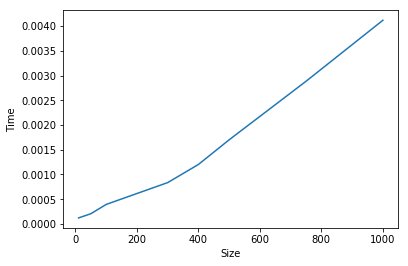

In [126]:
plt.plot(size, time)
plt.xlabel('Size')
plt.ylabel('Time')
plt.show()

#### Inverse Iteration